# pre-trained model 그대로 사용

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import Xception, InceptionV3, MobileNet, MobileNetV2

# MobileNet 사전학습모델 구축
## MobileNet 사전학습모델을 그대로 사용할 경우 input_shape=(224,224,3)

In [2]:
mobilenet_model = MobileNet(weights='imagenet', include_top=True, input_shape=(224,224,3))

mobilenet_model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

# MobileNetV2 사전학습모델 구축
## MobileNetV2 사전학습모델을 드대로 사용할 경우 input_shape=(224,224,3)

In [3]:
mobilenetv2_model = MobileNetV2(weights='imagenet', include_top=True, input_shape=(224,224,3))

mobilenetv2_model.summary()

14548992/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

# Xception 사전학습모델 구축
## Xception 사전학습모델을 드대로 사용할 경우 input_shape=(299,299,3)

In [4]:
xception_model = Xception(weights='imagenet', include_top=True, input_shape=(299,299,3))

xception_model.summary()

91897856/91884032 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

# InceptionV3 사전학습모델 구축
## InceptionV3 사전학습모델을 그대로 사용할 경우 input_shape=(299,299,3)

In [5]:
inceptionv3_model = InceptionV3(weights='imagenet', include_top=True, input_shape=(299,299,3))

inceptionv3_model.summary()

96124928/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 149, 149, 32  96         ['conv2d_4[0][0]']               
 rmalization)         

# 테스트 이미지 리스트  가져오기

In [6]:
import zipfile
with zipfile.ZipFile('/content/test_image_dir.zip') as target_file:

    target_file.extractall('/content/test_image_dir/')

In [7]:
import glob

# 테스트 이미지 가져오기

test_image_list = glob.glob('/content/test_image_dir/*.jpg')

print('total image # => ', len(test_image_list))
print(test_image_list)

total image # =>  8
['/content/test_image_dir/yorkshire_terrier.jpg', '/content/test_image_dir/tulip.jpg', '/content/test_image_dir/forget_me_not.jpg', '/content/test_image_dir/airliner.jpg', '/content/test_image_dir/satellite.jpg', '/content/test_image_dir/fighter_plane.jpg', '/content/test_image_dir/chihuahua.jpg', '/content/test_image_dir/transport.jpg']


# OpenCV 이용하여 테스트 이미지 로드 및 사이즈 변경

In [8]:
import cv2

dst_img_list_224 = []
dst_img_list_299 = []
label_str_list = []

for i in range(len(test_image_list)):

    src_img = cv2.imread(test_image_list[i], cv2.IMREAD_COLOR)

    dst_img_224 = cv2.resize(src_img, dsize=(224, 224))  # MobileNet, MobileNetV2
    dst_img_299 = cv2.resize(src_img, dsize=(299, 299))  # InceptionV3, Xception

    dst_img_224 = cv2.cvtColor(dst_img_224, cv2.COLOR_BGR2RGB)
    dst_img_299 = cv2.cvtColor(dst_img_299, cv2.COLOR_BGR2RGB)

    dst_img_224 = dst_img_224 / 255.0
    dst_img_299 = dst_img_299 / 255.0

    label_str = test_image_list[i].split('/')[-1].split('.')[0].strip()  # 이미지 정답 추출

    dst_img_list_224.append(dst_img_224)
    dst_img_list_299.append(dst_img_299)

    label_str_list.append(label_str)    # 이미지 정답 저장

# 테스트 이미지 출력

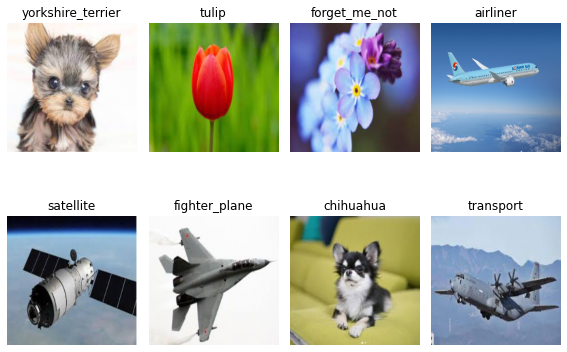

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for i in range(len(dst_img_list_224)):

    plt.subplot(2,4,i+1)
    plt.axis('off')

    plt.title(label_str_list[i])

    plt.imshow(dst_img_list_224[i])

plt.tight_layout()
plt.show()

# predict() 실행을 위한 4차원 텐서 변환

In [10]:
import numpy as np

dst_img_array_224 = np.array(dst_img_list_224)
dst_img_array_299 = np.array(dst_img_list_299)

print(dst_img_array_224.shape, dst_img_array_299.shape)

(8, 224, 224, 3) (8, 299, 299, 3)


# 각각의 사전학습 모델을 이용한 predict() 실행

In [11]:
mobilenet_pred = mobilenet_model.predict(dst_img_array_224)  # MobileNet prediction

mobilenetv2_pred = mobilenetv2_model.predict(dst_img_array_224)  # MobileNetV2 prediction

inceptionv3_pred = inceptionv3_model.predict(dst_img_array_299)  # InceptionV3 prediction

xception_pred = xception_model.predict(dst_img_array_299)        # Xception prediction

print(mobilenet_pred.shape)
print(mobilenetv2_pred.shape)
print(inceptionv3_pred.shape)
print(xception_pred.shape)

(8, 1000)
(8, 1000)
(8, 1000)
(8, 1000)


# decode_predictions() 실행을 통해 top3 확인

In [12]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions


mobilenet_prediction = decode_predictions(mobilenet_pred, top=3)  # MobileNet

mobilenetv2_prediction = decode_predictions(mobilenetv2_pred, top=3)  # MobileNetV2

xception_prediction = decode_predictions(xception_pred, top=3)  # Xception

inceptionv3_prediction = decode_predictions(inceptionv3_pred, top=3)  # InceptionV3

49152/35363 [=========================================] - 0s 0us/step


In [13]:
print(type(mobilenet_prediction))
print(type(mobilenetv2_prediction))
print(type(xception_prediction))
print(type(inceptionv3_prediction))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


# MobileNet 사전학습 모델 예측 결과 확인

In [14]:
print('MobileNet Prediction Result')

for i in range(len(mobilenet_prediction)):

    print('===============================')
    print('label=', label_str_list[i])
    print(mobilenet_prediction[i])
    print('===============================')

MobileNet Prediction Result
label= yorkshire_terrier
[('n02094433', 'Yorkshire_terrier', 0.8546712), ('n02087046', 'toy_terrier', 0.04420378), ('n02112706', 'Brabancon_griffon', 0.042138856)]
label= tulip
[('n12620546', 'hip', 0.39781353), ('n12057211', "yellow_lady's_slipper", 0.1441034), ('n03942813', 'ping-pong_ball', 0.044616163)]
label= forget_me_not
[('n03476684', 'hair_slide', 0.21029872), ('n11939491', 'daisy', 0.17922306), ('n02219486', 'ant', 0.15513422)]
label= airliner
[('n02690373', 'airliner', 0.97014153), ('n04592741', 'wing', 0.02900545), ('n04552348', 'warplane', 0.00051675906)]
label= satellite
[('n04286575', 'spotlight', 0.30719844), ('n04258138', 'solar_dish', 0.10327916), ('n04266014', 'space_shuttle', 0.08793588)]
label= fighter_plane
[('n04552348', 'warplane', 0.9673469), ('n04008634', 'projectile', 0.009557633), ('n02687172', 'aircraft_carrier', 0.007975997)]
label= chihuahua
[('n02086910', 'papillon', 0.78425014), ('n02085782', 'Japanese_spaniel', 0.09525918), 

# MobileNetV2 사전학습 모델 예측 결과 확인

In [15]:
print('MobileNetV2 Prediction Result')

for i in range(len(mobilenetv2_prediction)):

    print('===============================')
    print('label=', label_str_list[i])
    print(mobilenetv2_prediction[i])
    print('===============================')

MobileNetV2 Prediction Result
label= yorkshire_terrier
[('n02094433', 'Yorkshire_terrier', 0.86767805), ('n02087046', 'toy_terrier', 0.012168534), ('n02094114', 'Norfolk_terrier', 0.010963526)]
label= tulip
[('n02782093', 'balloon', 0.44253013), ('n04023962', 'punching_bag', 0.115183), ('n03970156', 'plunger', 0.03565849)]
label= forget_me_not
[('n11939491', 'daisy', 0.14471938), ('n04522168', 'vase', 0.08606233), ('n03944341', 'pinwheel', 0.054827068)]
label= airliner
[('n02690373', 'airliner', 0.66737765), ('n04592741', 'wing', 0.11324361), ('n02692877', 'airship', 0.030244036)]
label= satellite
[('n02841315', 'binoculars', 0.24337345), ('n04266014', 'space_shuttle', 0.15833381), ('n02950826', 'cannon', 0.14974219)]
label= fighter_plane
[('n04552348', 'warplane', 0.31001326), ('n04008634', 'projectile', 0.09292822), ('n03773504', 'missile', 0.051084574)]
label= chihuahua
[('n02112350', 'keeshond', 0.10283954), ('n02086910', 'papillon', 0.0868048), ('n02110063', 'malamute', 0.04661800

# Xception 사전학습 모델 예측 결과 확인

In [16]:
print('Xception Prediction Result')

for i in range(len(xception_prediction)):

    print('===============================')
    print('label=', label_str_list[i])
    print(xception_prediction[i])
    print('===============================')

Xception Prediction Result
label= yorkshire_terrier
[('n02094433', 'Yorkshire_terrier', 0.9667439), ('n02096294', 'Australian_terrier', 0.0049285316), ('n02087046', 'toy_terrier', 0.0035948344)]
label= tulip
[('n12057211', "yellow_lady's_slipper", 0.51788), ('n02782093', 'balloon', 0.026356611), ('n07720875', 'bell_pepper', 0.010004384)]
label= forget_me_not
[('n03991062', 'pot', 0.17461261), ('n04522168', 'vase', 0.1376073), ('n02280649', 'cabbage_butterfly', 0.072717175)]
label= airliner
[('n02690373', 'airliner', 0.8822205), ('n04592741', 'wing', 0.052037537), ('n02692877', 'airship', 0.005192047)]
label= satellite
[('n04258138', 'solar_dish', 0.40275985), ('n03773504', 'missile', 0.2305102), ('n04008634', 'projectile', 0.16713844)]
label= fighter_plane
[('n04552348', 'warplane', 0.8531667), ('n04008634', 'projectile', 0.015979875), ('n02687172', 'aircraft_carrier', 0.014224376)]
label= chihuahua
[('n02086910', 'papillon', 0.28364566), ('n02085782', 'Japanese_spaniel', 0.17149389), 

# InceptionV3 사전학습 모델 예측 결과 확인

In [17]:
print('InceptionV3 Prediction Result')

for i in range(len(inceptionv3_prediction)):

    print('===============================')
    print('label=', label_str_list[i])
    print(inceptionv3_prediction[i])
    print('===============================')

InceptionV3 Prediction Result
label= yorkshire_terrier
[('n02094433', 'Yorkshire_terrier', 0.96082914), ('n02112706', 'Brabancon_griffon', 0.0035921438), ('n02087046', 'toy_terrier', 0.002666943)]
label= tulip
[('n12620546', 'hip', 0.11448471), ('n12057211', "yellow_lady's_slipper", 0.09314614), ('n02206856', 'bee', 0.06257124)]
label= forget_me_not
[('n03476684', 'hair_slide', 0.24089137), ('n04522168', 'vase', 0.12421815), ('n03991062', 'pot', 0.09540622)]
label= airliner
[('n02690373', 'airliner', 0.9383795), ('n04592741', 'wing', 0.014866073), ('n02641379', 'gar', 0.0009518755)]
label= satellite
[('n03773504', 'missile', 0.34933802), ('n04008634', 'projectile', 0.2371813), ('n04266014', 'space_shuttle', 0.12380443)]
label= fighter_plane
[('n04552348', 'warplane', 0.83861256), ('n04008634', 'projectile', 0.06277262), ('n03773504', 'missile', 0.04466019)]
label= chihuahua
[('n02086910', 'papillon', 0.4842609), ('n02085620', 'Chihuahua', 0.28755978), ('n02112018', 'Pomeranian', 0.0682